In [191]:
#from google.colab import drive
#drive.mount('/content/drive')

In [192]:
import pandas as pd
import numpy as np

In [193]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [194]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [195]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [196]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [197]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=9:
        a.append(i)

In [198]:
df = df.drop(a)

In [199]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
4464,1958,1,28,30.9,23.3,91,0.2,kerala,kollam,0,9,5,6,15,17,13,34
4465,1958,2,52,30.9,24.5,87,0.9,kerala,kollam,0,9,5,6,15,17,13,34
4466,1958,3,107,32.0,25.6,123,1.7,kerala,kollam,0,9,5,6,15,17,13,34
4467,1958,4,173,31.3,25.6,130,2.1,kerala,kollam,0,9,5,6,15,17,13,34
4468,1958,5,499,30.4,25.3,124,3.1,kerala,kollam,0,9,5,6,15,17,13,34


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22320 entries, 4464 to 441191
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            22320 non-null  int64  
 1   Month           22320 non-null  int64  
 2   ppt(mm)         22320 non-null  int64  
 3   tmax(degC)      22320 non-null  float64
 4   tmin(degC)      22320 non-null  float64
 5   aet(mm)         22320 non-null  int64  
 6   PDSI(unitless)  22320 non-null  float64
 7   state           22320 non-null  object 
 8   district        22320 non-null  object 
 9   cluster14       22320 non-null  int64  
 10  cluster15       22320 non-null  int64  
 11  cluster18       22320 non-null  int64  
 12  cluster20       22320 non-null  int64  
 13  cluster25       22320 non-null  int64  
 14  cluster27       22320 non-null  int64  
 15  cluster30       22320 non-null  int64  
 16  cluster35       22320 non-null  int64  
dtypes: float64(3), int64(12), o

In [201]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(22320, 8)

In [202]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [203]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
4464,1958,1,28,30.9,23.3,91,0.2,kollam,1-1958
4465,1958,2,52,30.9,24.5,87,0.9,kollam,2-1958
4466,1958,3,107,32.0,25.6,123,1.7,kollam,3-1958
4467,1958,4,173,31.3,25.6,130,2.1,kollam,4-1958
4468,1958,5,499,30.4,25.3,124,3.1,kollam,5-1958


In [204]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [205]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
4464,1958,1,28,30.9,23.3,91,0.2,kollam,1958-01-01,1
4465,1958,2,52,30.9,24.5,87,0.9,kollam,1958-02-01,1
4466,1958,3,107,32.0,25.6,123,1.7,kollam,1958-03-01,1
4467,1958,4,173,31.3,25.6,130,2.1,kollam,1958-04-01,1
4468,1958,5,499,30.4,25.3,124,3.1,kollam,1958-05-01,1


In [206]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
4464,1958,1,28,91,0.2,kollam,1958-01-01,1,27.10
4465,1958,2,52,87,0.9,kollam,1958-02-01,1,27.70
4466,1958,3,107,123,1.7,kollam,1958-03-01,1,28.80
4467,1958,4,173,130,2.1,kollam,1958-04-01,1,28.45
4468,1958,5,499,124,3.1,kollam,1958-05-01,1,27.85


In [207]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
441187,2019,8,199,134,-2.9,golaghat,2019-08-01,1,30.80
441188,2019,9,224,101,-2.5,golaghat,2019-09-01,1,28.75
441189,2019,10,145,95,-1.9,golaghat,2019-10-01,1,26.60
441190,2019,11,41,61,-1.3,golaghat,2019-11-01,1,23.75
441191,2019,12,5,38,-1.0,golaghat,2019-12-01,1,17.80


In [208]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,27,26.95,93,kollam
1,1981-02-01,20,27.50,82,kollam
2,1981-03-01,56,29.00,97,kollam
3,1981-04-01,158,29.20,150,kollam
4,1981-05-01,347,28.80,148,kollam


In [209]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
5196,2019,1,3,87,-1.4,kollam,2019-01-01,1,27.45
5197,2019,2,19,70,-1.8,kollam,2019-02-01,1,29.05
5198,2019,3,31,66,-2.4,kollam,2019-03-01,1,29.75
5199,2019,4,181,151,-1.9,kollam,2019-04-01,1,30.05
5200,2019,5,108,118,-2.4,kollam,2019-05-01,1,30.10
...,...,...,...,...,...,...,...,...,...
441187,2019,8,199,134,-2.9,golaghat,2019-08-01,1,30.80
441188,2019,9,224,101,-2.5,golaghat,2019-09-01,1,28.75
441189,2019,10,145,95,-1.9,golaghat,2019-10-01,1,26.60
441190,2019,11,41,61,-1.3,golaghat,2019-11-01,1,23.75


In [210]:
from fbprophet import Prophet

In [211]:

model = Prophet()

In [212]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
13675,2018-08-01,281,29.50,106,golaghat
13676,2018-09-01,188,28.70,97,golaghat
13677,2018-10-01,53,25.35,78,golaghat
13678,2018-11-01,21,21.65,44,golaghat
13679,2018-12-01,19,17.95,35,golaghat


In [215]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [216]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [217]:

forecast = model.predict(fut)

In [218]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,21.707535,19.486616,30.544914,21.706766,21.708474,3.053205,3.053205,3.053205,3.053205,3.053205,3.053205,0.0,0.0,0.0,24.760740
465,2019-09-30,21.705060,17.923475,29.278605,21.704013,21.706209,1.761558,1.761558,1.761558,1.761558,1.761558,1.761558,0.0,0.0,0.0,23.466618
466,2019-10-31,21.702502,14.649001,26.029237,21.701239,21.703929,-1.263842,-1.263842,-1.263842,-1.263842,-1.263842,-1.263842,0.0,0.0,0.0,20.438660
467,2019-11-30,21.700026,10.633882,22.765676,21.698551,21.701909,-4.885637,-4.885637,-4.885637,-4.885637,-4.885637,-4.885637,0.0,0.0,0.0,16.814390
468,2019-12-31,21.697468,9.778611,20.958207,21.695734,21.699735,-6.383140,-6.383140,-6.383140,-6.383140,-6.383140,-6.383140,0.0,0.0,0.0,15.314328


In [219]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,24.760740,19.486616,30.544914
465,2019-09-30,23.466618,17.923475,29.278605
466,2019-10-31,20.438660,14.649001,26.029237
467,2019-11-30,16.814390,10.633882,22.765676
468,2019-12-31,15.314328,9.778611,20.958207


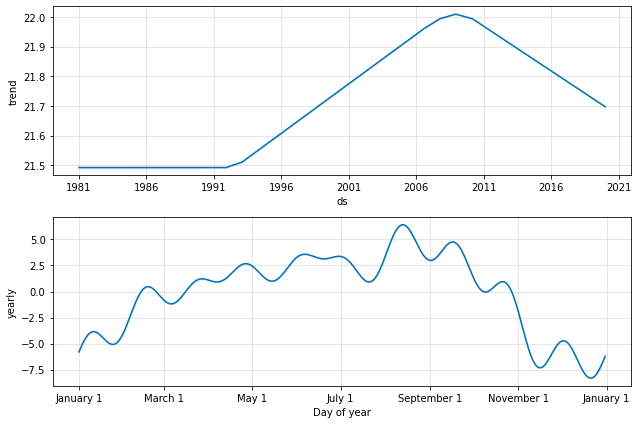

In [220]:
fig2 = model.plot_components(forecast)

In [221]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (360, 1)
25.58142393202045


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,27.45,1,17.408911
1,12.45,1,17.408911
2,27.15,1,17.408911
3,16.85,1,17.408911
4,4.85,1,17.408911
...,...,...,...
355,18.70,12,15.314328
356,12.15,12,15.314328
357,18.60,12,15.314328
358,17.90,12,15.314328


In [222]:
import matplotlib.pyplot as plt

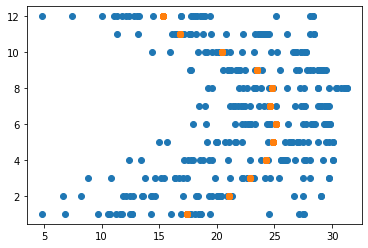

In [223]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [224]:
import pickle

In [225]:
filename = 'Cluster 15 - 9.sav'
pickle.dump(model, open(filename, 'wb'))

In [226]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [227]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,21.492419,9.825359,20.845200,21.492419,21.492419,-5.799990,-5.799990,-5.799990,-5.799990,-5.799990,-5.799990,0.0,0.0,0.0,15.692429
1,1981-02-01,21.492420,11.334088,23.318977,21.492420,21.492420,-3.904248,-3.904248,-3.904248,-3.904248,-3.904248,-3.904248,0.0,0.0,0.0,17.588172
2,1981-03-01,21.492421,14.869057,26.191684,21.492421,21.492421,-0.859570,-0.859570,-0.859570,-0.859570,-0.859570,-0.859570,0.0,0.0,0.0,20.632851
3,1981-04-01,21.492421,16.869366,28.581299,21.492421,21.492421,1.082245,1.082245,1.082245,1.082245,1.082245,1.082245,0.0,0.0,0.0,22.574666
4,1981-05-01,21.492422,18.340786,29.811245,21.492422,21.492422,2.434235,2.434235,2.434235,2.434235,2.434235,2.434235,0.0,0.0,0.0,23.926657
